In [2]:
#import packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import statistics
import seaborn as sns

#get data
data = pd.read_csv('movieReplicationSet.csv')

# Q1


In [3]:
data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


**Q1:**
For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict from the ratings of a single other movie (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [4]:
# get the mean of each user
average_row = data.iloc[:,:400].mean(axis=1)

# get the mean of each movie
average_column = {}
for i in data.columns:
    average_column[str(i)]=data[i].mean()

# get the average of user_mean and movie_mean
average_per_user_per_movie = data.iloc[:,:400]
for i in range(data.shape[0]):
    for j in average_per_user_per_movie.columns:
            average_per_user_per_movie.at[i,j]=(average_row[i]+average_column[j])/2

# if the original dataset has NAs, replace them with means in average_per_user_per_movie
# for example, the rating user0 gives to movie Snatch (2000) is NaN, replace the NaN with (the average rating user0 gives + the average rating movie Snatch (2000) receives)/2
data_clean_NA = data.iloc[:,:400]
for i in range(data_clean_NA.shape[0]):
    for j in range(400):
        if data_clean_NA.isnull().iloc[i,j]:
            data_clean_NA.iloc[i,j] = average_per_user_per_movie.iloc[i,j]
# remove rows with any values that are infinite
data_clean_NA = data_clean_NA[np.isfinite(data_clean_NA).all(1)]

In [5]:
# start regression from here:
data_clean_NA

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.057031,3.150518,2.879523,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,4.000000,3.387353,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.023296,3.116783,2.845788,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.152344,3.245831,2.974835,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

COD = np.zeros([400,400])
Max_COD = np.zeros(400)
best_predictor = np.zeros(400)

# predictor movie
for i in range(400):
    # outcome movie
    for j in range(400):
        # if the movie is predicting itself, set the COD to 0, otherwise it would be 1
        if i == j:
            COD[i,j]=0
        else:
            predict = data_clean_NA.iloc[:,i].values.reshape(-1,1)
            outcome = data_clean_NA.iloc[:,j].values.reshape(-1,1)
            reg = LinearRegression().fit(predict,outcome)
            outcome_hat = reg.predict(predict)
            COD[i,j] = r2_score(outcome,outcome_hat)

# find the largest COD for each movie and the movie that predicts it best
for i in range(400):
    Max_COD[i] = np.max(COD[:,i])
    best_predictor[i] = np.argmax(COD[:,i])



In [7]:
# the average of the 400 simple linear regression models
np.average(Max_COD)

0.42378171067196035

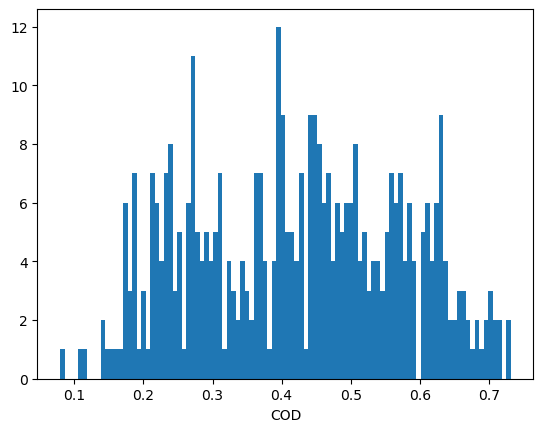

In [8]:
#a histogram of these 400 COD values
import matplotlib.pyplot as plt
plt.hist(Max_COD,bins=100)
plt.xlabel("COD")
plt.show()

In [9]:
#10 movies that are most easily predicted from the ratings of a single other movie
Easiest10 = sorted(Max_COD,reverse=True)[:10]

Easiest10movies = []
Easiest10COD = []
Easiest10predictors = []

print("10 easiest to predict:")
for i in range (400):
    if Max_COD[i] in Easiest10:
        Easiest10movies.append(data_clean_NA.columns.values.tolist()[i])
        Easiest10COD.append(Max_COD[i])
        Easiest10predictors.append(data_clean_NA.columns.values.tolist()[int(best_predictor[i])])
data_easiest10 = {'movies': Easiest10movies,
        'COD': Easiest10COD,
        'predictors':Easiest10predictors}
Top10 = pd.DataFrame(data_easiest10)
Top10



10 easiest to predict:


,movies,COD,predictors
0,Erik the Viking (1989),0.731507,I.Q. (1994)
1,I.Q. (1994),0.731507,Erik the Viking (1989)
2,The Bandit (1996),0.711222,Best Laid Plans (1999)
3,Best Laid Plans (1999),0.711222,The Bandit (1996)
4,Congo (1995),0.700569,The Straight Story (1999)
5,The Straight Story (1999),0.700569,Congo (1995)
6,Ran (1985),0.692734,Heavy Traffic (1973)
7,Heavy Traffic (1973),0.692734,Ran (1985)
8,The Final Conflict (1981),0.700188,The Lookout (2007)
9,The Lookout (2007),0.713554,Patton (1970)


In [10]:
#10 movies that are hardest to predict from the ratings of a single other movie
hardest10 = sorted(Max_COD)[:10]

hardest10movies = []
hardest10COD = []
hardest10predictors = []
print("10 hardest to predict:")

for i in range (400):
    if Max_COD[i] in hardest10:
        hardest10movies.append(data_clean_NA.columns.values.tolist()[i])
        hardest10COD.append(Max_COD[i])
        hardest10predictors.append(data_clean_NA.columns.values.tolist()[int(best_predictor[i])])
data_hardest10 = {'movies': hardest10movies,
        'COD': hardest10COD,
        'predictors':hardest10predictors}
Bottom10 = pd.DataFrame(data_hardest10)
Bottom10

10 hardest to predict:


,movies,COD,predictors
0,Black Swan (2010),0.117080,Sorority Boys (2002)
1,The Fast and the Furious (2001),0.168991,Terminator 3: Rise of the Machines (2003)
2,13 Going on 30 (2004),0.160164,Can't Hardly Wait (1998)
3,Clueless (1995),0.141426,Escape from LA (1996)
4,Avatar (2009),0.079485,Bad Boys (1995)
5,Interstellar (2014),0.111343,Torque (2004)
6,The Cabin in the Woods (2012),0.143887,The Evil Dead (1981)
7,Grown Ups 2 (2013),0.171119,The Core (2003)
8,Titanic (1997),0.154136,Cocktail (1988)
9,La La Land (2016),0.148514,The Lookout (2007)


**Q2:**
For the 10 movies that are best and least well predicted from the ratings of a single other movie (so
20 in total), build multiple regression models that include gender identity (column 475), sibship status
(column 476) and social viewing preferences (column 477) as additional predictors (in addition to the
best predicting movie from question 1). Comment on how R^2 has changed relative to the answers
in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear
regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple
regression models) is on the y-axis

# Q2


In [11]:
#Adding in gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors
data_clean_NA_Q2 = data_clean_NA.join(data["Gender identity (1 = female; 2 = male; 3 = self-described)"])
data_clean_NA_Q2 = data_clean_NA_Q2.join(data["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"])
data_clean_NA_Q2 = data_clean_NA_Q2.join(data["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"])

In [12]:
# remove rows where gender identity = 3 (self-described), and those that didn't respond to sibship status and social viewing preferences
# remove NAs
data_clean_NA_Q2.drop(data_clean_NA_Q2[data_clean_NA_Q2["Gender identity (1 = female; 2 = male; 3 = self-described)"]==3].index,inplace=True)
data_clean_NA_Q2.drop(data_clean_NA_Q2[data_clean_NA_Q2["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==-1].index,inplace=True)
data_clean_NA_Q2.drop(data_clean_NA_Q2[data_clean_NA_Q2["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]==-1].index,inplace=True)
data_clean_NA_Q2 = data_clean_NA_Q2.dropna()

In [13]:
data_clean_NA_Q2

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981,1.0,0,0
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000,1.0,0,0
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247,1.0,0,0
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294,1.0,0,1


In [14]:
# For the 10 best predicted movies, do a multiple regression, and compare the COD for simple linear regression and the COD for multiple linear regression
Easiest10COD_multiple = []

for i in range(len(Easiest10movies)):
  y = data_clean_NA_Q2[Easiest10movies[i]].to_numpy()
  x1 = data_clean_NA_Q2[Easiest10predictors[i]].to_numpy()
  x2 = data_clean_NA_Q2["Gender identity (1 = female; 2 = male; 3 = self-described)"].to_numpy()
  x3 = data_clean_NA_Q2["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"].to_numpy()
  x4 = data_clean_NA_Q2["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"].to_numpy()
  predict_multipleregression = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1)), axis=1)
  outcome_multipleregression = y
  multipleregression = LinearRegression().fit(predict_multipleregression,outcome_multipleregression)
  outcome_multipleregression_hat = multipleregression.predict(predict_multipleregression)
  r2 = r2_score(outcome_multipleregression,outcome_multipleregression_hat)
  Easiest10COD_multiple.append(r2)

data_easiest10_multiple = {'movies': Easiest10movies,
        'COD_before': Easiest10COD,
        'predictors':Easiest10predictors,
        'COD_after': Easiest10COD_multiple}
Top10_multiple = pd.DataFrame(data_easiest10_multiple)
Top10_multiple

,movies,COD_before,predictors,COD_after
0,Erik the Viking (1989),0.731507,I.Q. (1994),0.731189
1,I.Q. (1994),0.731507,Erik the Viking (1989),0.730001
2,The Bandit (1996),0.711222,Best Laid Plans (1999),0.714365
3,Best Laid Plans (1999),0.711222,The Bandit (1996),0.714364
4,Congo (1995),0.700569,The Straight Story (1999),0.697978
5,The Straight Story (1999),0.700569,Congo (1995),0.698955
6,Ran (1985),0.692734,Heavy Traffic (1973),0.689188
7,Heavy Traffic (1973),0.692734,Ran (1985),0.689183
8,The Final Conflict (1981),0.700188,The Lookout (2007),0.697624
9,The Lookout (2007),0.713554,Patton (1970),0.711419


In [15]:
# For the 10 worst predicted movies, do a multiple regression, and compare the COD for simple linear regression and the COD for multiple linear regression
hardest10COD_multiple = []

for i in range(len(hardest10movies)):
  y = data_clean_NA_Q2[hardest10movies[i]].to_numpy()
  x1 = data_clean_NA_Q2[hardest10predictors[i]].to_numpy()
  x2 = data_clean_NA_Q2["Gender identity (1 = female; 2 = male; 3 = self-described)"].to_numpy()
  x3 = data_clean_NA_Q2["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"].to_numpy()
  x4 = data_clean_NA_Q2["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"].to_numpy()
  predict_multipleregression = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1)), axis=1)
  outcome_multipleregression = y
  multipleregression = LinearRegression().fit(predict_multipleregression,outcome_multipleregression)
  outcome_multipleregression_hat = multipleregression.predict(predict_multipleregression)
  r2 = r2_score(outcome_multipleregression,outcome_multipleregression_hat)
  hardest10COD_multiple.append(r2)

data_hardest10_multiple = {'movies': hardest10movies,
        'COD_before': hardest10COD,
        'predictors':hardest10predictors,
        'COD_after': hardest10COD_multiple}
Bottom10_multiple = pd.DataFrame(data_hardest10_multiple)
Bottom10_multiple

,movies,COD_before,predictors,COD_after
0,Black Swan (2010),0.117080,Sorority Boys (2002),0.111329
1,The Fast and the Furious (2001),0.168991,Terminator 3: Rise of the Machines (2003),0.168252
2,13 Going on 30 (2004),0.160164,Can't Hardly Wait (1998),0.161111
3,Clueless (1995),0.141426,Escape from LA (1996),0.149355
4,Avatar (2009),0.079485,Bad Boys (1995),0.084557
5,Interstellar (2014),0.111343,Torque (2004),0.116948
6,The Cabin in the Woods (2012),0.143887,The Evil Dead (1981),0.151396
7,Grown Ups 2 (2013),0.171119,The Core (2003),0.173943
8,Titanic (1997),0.154136,Cocktail (1988),0.154270
9,La La Land (2016),0.148514,The Lookout (2007),0.148778


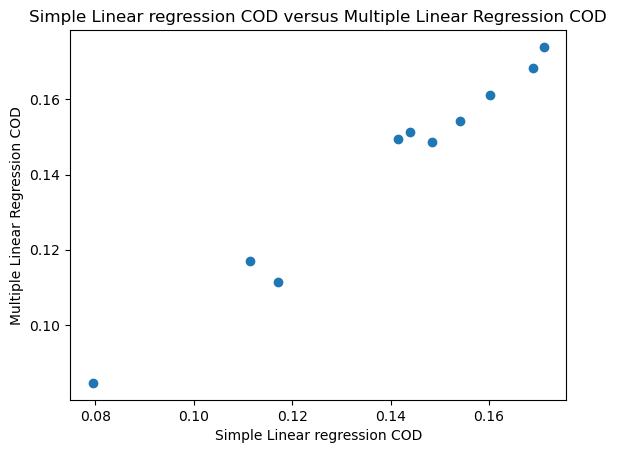

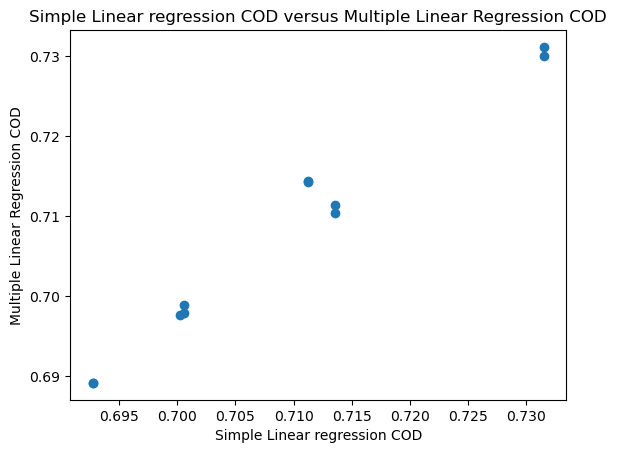

In [16]:
plt.plot(hardest10COD,hardest10COD_multiple,"o")
plt.title("Simple Linear regression COD versus Multiple Linear Regression COD")
plt.xlabel('Simple Linear regression COD')
plt.ylabel('Multiple Linear Regression COD')
plt.show()

plt.plot(Easiest10COD,Easiest10COD_multiple,"o")
plt.title("Simple Linear regression COD versus Multiple Linear Regression COD")
plt.xlabel('Simple Linear regression COD')
plt.ylabel('Multiple Linear Regression COD')
plt.show()

# Q3

In [17]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# select 30 movies from the middle of the COD range and randomly pick 10 from other movies
sortedCOD = np.argsort(Max_COD)

middleMovies = data_clean_NA.iloc[:,sortedCOD[185:215]]
middleMovies = middleMovies.drop(middleMovies.columns[11], axis=1)
middleMovies['Aliens (1986)'] = data_clean_NA.iloc[:, sortedCOD[184]]

selected = np.random.choice(np.arange(1, 400), size=10, replace=False)
otherMovies = data_clean_NA.iloc[:, sortedCOD[selected]]
filterMovies = hardest10predictors+Easiest10predictors+middleMovies.columns.tolist()
while (any(movie in otherMovies for movie in filterMovies)):
  selected = np.random.choice(np.arange(1, 370), size=10, replace=False)
  otherMovies = data_clean_NA.iloc[:, sortedCOD[selected]]

# 80/20 train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(otherMovies, middleMovies,train_size = 0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

pmovies = []
ppredictors = []
palpha = []
pRMSE = []
pcoef = []

for i in range(30): # for the 30 movies selected
  if i in range(10):
    ppredictors.append(otherMovies.columns[i])
  ridge = RidgeCV(alphas=[2.0**c for c in np.arange(-10, 10)])
  bestAlpha = ridge.fit(X_train,y_train.iloc[:,i]).alpha_
  ridgeUpdate = Ridge(alpha=bestAlpha).fit(X_train,y_train.iloc[:,i])
  RMSE = round(mean_squared_error(ridgeUpdate.predict(X_test),y_test.iloc[:,i]), 4)

  pmovies.append(middleMovies.columns[i])
  palpha.append(bestAlpha)
  pRMSE.append(RMSE)
  pcoef.append([round(coeff, 4) for coeff in ridgeUpdate.coef_])

print("10 other movies picked: ", ppredictors)
movies_data = {'Movies': pmovies,
            'Alpha': palpha,
            'RMSE': pRMSE,
            'Coefficients': pcoef}
pmov = pd.DataFrame(movies_data)
pmov

10 other movies picked:  ['Hollow Man (2000)', 'Psycho (1960)', 'Baby Geniuses (1999)', 'The Texas Chainsaw Massacre (1974)', 'Aladdin (1992)', 'Harry Potter and the Chamber of Secrets (2002)', 'Jurassic Park (1993)', 'Sling Blade (1996)', 'Almost Famous (2000)', 'Mulholland Dr. (2001)']


,Movies,Alpha,RMSE,Coefficients
0,Gone in Sixty Seconds (2000),64.0,0.0909,"[0.1189, 0.0827, 0.1127, 0.074, 0.0087, 0.0086..."
1,Crossroads (2002),16.0,0.0897,"[0.2868, 0.0392, 0.098, 0.0165, -0.0457, 0.044..."
2,Austin Powers in Goldmember (2002),32.0,0.3504,"[0.2285, 0.0439, 0.1266, 0.0915, 0.0174, 0.084..."
3,Austin Powers: The Spy Who Shagged Me (1999),64.0,0.3864,"[0.2249, 0.0414, 0.1713, 0.0482, 0.0191, 0.021..."
4,Goodfellas (1990),32.0,0.0947,"[0.1301, 0.0939, 0.1163, 0.0194, 0.0848, 0.033..."
5,The Big Lebowski (1998),32.0,0.1225,"[0.1499, 0.041, 0.0088, 0.0299, 0.0644, -0.015..."
6,Twister (1996),16.0,0.0973,"[0.1614, 0.0011, 0.0277, 0.0142, 0.0374, 0.052..."
7,Blues Brothers 2000 (1998),64.0,0.1218,"[0.1189, 0.109, 0.1246, 0.0407, 0.0154, 0.0525..."
8,Dances with Wolves (1990),32.0,0.0770,"[0.1566, 0.034, 0.1377, 0.0038, 0.0516, 0.0108..."
9,28 Days Later (2002),16.0,0.1245,"[0.2604, 0.0014, 0.087, -0.0013, -0.0072, 0.00..."


# Q4

In [18]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

pmovies = []
palpha = []
pRMSE = []
pcoef = []

for i in range(30): # for the 30 movies selected
    lasso = LassoCV(alphas=[2.0**c for c in np.arange(-15,10)])
    bestAlpha = lasso.fit(X_train,y_train.iloc[:,i]).alpha_
    lassoUpdate = Lasso(alpha=bestAlpha).fit(X_train, y_train.iloc[:, i])
    RMSE = round(mean_squared_error(lassoUpdate.predict(X_test), y_test.iloc[:, i]), 4)

    pmovies.append(middleMovies.columns[i])
    palpha.append(bestAlpha)
    pRMSE.append(RMSE)
    rounded_coef = [round(coeff, 4) for coeff in lassoUpdate.coef_]
    pcoef.append([round(coeff, 4) for coeff in lassoUpdate.coef_])

movies_data = {'movies': pmovies,
            'Alpha': palpha,
            'RMSE': pRMSE,
            'Coefficients': pcoef}
pmov = pd.DataFrame(movies_data)
pmov

,movies,Alpha,RMSE,Coefficients
0,Gone in Sixty Seconds (2000),0.001953,0.0874,"[0.1629, 0.0764, 0.1192, 0.0731, 0.0, 0.0, 0.0..."
1,Crossroads (2002),0.000977,0.0900,"[0.3391, 0.0333, 0.0888, 0.0123, -0.0487, 0.04..."
2,Austin Powers in Goldmember (2002),0.007812,0.3476,"[0.2758, 0.029, 0.1235, 0.0872, 0.002, 0.0822,..."
3,Austin Powers: The Spy Who Shagged Me (1999),0.007812,0.3832,"[0.3476, 0.0161, 0.1939, 0.0392, 0.0, 0.0039, ..."
4,Goodfellas (1990),0.003906,0.0946,"[0.1323, 0.0872, 0.1185, 0.0105, 0.0826, 0.025..."
5,The Big Lebowski (1998),0.007812,0.1237,"[0.1409, 0.0241, 0.0, 0.0201, 0.0511, -0.0, 0...."
6,Twister (1996),0.003906,0.0987,"[0.1635, 0.0, 0.0117, 0.0073, 0.0337, 0.0516, ..."
7,Blues Brothers 2000 (1998),0.001953,0.1213,"[0.1628, 0.1144, 0.1361, 0.0334, 0.0005, 0.048..."
8,Dances with Wolves (1990),0.003906,0.0786,"[0.1785, 0.0194, 0.1438, 0.0, 0.0464, 0.0017, ..."
9,28 Days Later (2002),0.007812,0.1250,"[0.2694, 0.0, 0.0744, 0.0, 0.0, 0.0008, 0.0449..."


# Q5

## Data Handling

In [19]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from scipy.special import expit

In [20]:
#clean data - handle NaN values
clean_df = data.copy()

for i in range(0,400): #movie columns
    movie_mean = data.iloc[:,i].mean()
    for n in range(len(data)): #user rows
        user_mean = data.iloc[n,0:400].mean()
        if not np.isnan(clean_df.iloc[n,i]):
            continue
        else:
            if (not np.isnan(movie_mean)) and (not np.isnan(user_mean)):
                clean_df.iloc[n,i] = (movie_mean + user_mean)/2
            elif np.isnan(movie_mean):
                clean_df.iloc[n,i] = user_mean
            elif np.isnan(user_mean):
                clean_df.iloc[n,i] = movie_mean
            else:
                clean_df.iloc[n,i] = 0

In [21]:
#display dataframe
display(clean_df)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


## Get test_X

In [22]:
#Compute the average movie enjoyment for each user (using only real, non-imputed data).
user_df = data.iloc[:,0:400].copy().aggregate('mean', 'columns').fillna(0)

In [23]:
user_df

0       2.742857
1       2.727273
2       3.314815
3       2.414634
4       2.266949
          ...   
1092    3.200000
1093    3.673669
1094    3.132530
1095    3.390625
1096    2.873874
Length: 1097, dtype: float64

In [24]:
X = np.array(user_df).reshape(-1, 1)

## Get target movies

In [25]:
#Compute average user enjoyment for each movie and sort the movies order of increasing rating
#(also using only real, non-imputed data)
movie_df = data.iloc[:,0:400].copy().aggregate('mean', 'rows').sort_values(ascending=True)

In [26]:
movie_df

3000 Miles to Graceland (2001)     1.915584
North (1994)                       1.929487
Barb Wire (1996)                   1.966667
Battlefield Earth (2000)           2.006757
In America (2002)                  2.006944
                                     ...   
Good Will Hunting (1997)           3.362403
The Shawshank Redemption (1994)    3.378827
Finding Nemo (2003)                3.388067
Spirited Away (2001)               3.414207
The Lion King (1994)               3.459979
Length: 400, dtype: float64

In [27]:
#Pick the 4 movies in the middle of the score range as your target movie
target_movies = movie_df[198:202]
target_movies

Fahrenheit 9/11 (2004)         2.578014
Happy Gilmore (1996)           2.581169
Diamonds are Forever (1971)    2.582677
Scream (1996)                  2.584270
dtype: float64

## Get train_X, train_y, and test_y for all 4 movies

In [28]:
#For each of the target movies, do a median split (now using the imputed data) of ratings to code movies above the
#median rating with the Y label 1 (= enjoyed) and movies below the median with the label 0 (= not enjoyed)

#Fahrenheit 9/11 (2004)
fahr_med = statistics.median(clean_df['Fahrenheit 9/11 (2004)'])
fahr_split = []

for i in range(len(clean_df)):
    if clean_df.loc[i, 'Fahrenheit 9/11 (2004)'] < fahr_med:
        fahr_split.append(0)
    else:
        fahr_split.append(1)

fahr_split = np.array(fahr_split).reshape(-1, 1)
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X, fahr_split, test_size = 0.33, random_state=0)



#Happy Gilmore (1996)
hg_med = statistics.median(clean_df['Happy Gilmore (1996)'])
hg_split = []

for i in range(len(clean_df)):
    if clean_df.loc[i, 'Happy Gilmore (1996)'] < hg_med:
        hg_split.append(0)
    else:
        hg_split.append(1)

hg_split = np.array(hg_split).reshape(-1, 1)
X_trainh, X_testh, y_trainh, y_testh = train_test_split(X, hg_split, test_size = 0.33, random_state=0)


#Diamonds are Forever (1971)
diam_med = statistics.median(clean_df['Diamonds are Forever (1971)'])
diam_split = []

for i in range(len(clean_df)):
    if clean_df.loc[i, 'Diamonds are Forever (1971)'] < diam_med:
        diam_split.append(0)
    else:
        diam_split.append(1)

diam_split = np.array(diam_split).reshape(-1, 1)
X_traind, X_testd, y_traind, y_testd = train_test_split(X, diam_split, test_size = 0.33, random_state=0)

#Scream (1996)
scream_med = statistics.median(clean_df['Scream (1996)'])
scream_split = []

for i in range(len(clean_df)):
    if clean_df.loc[i, 'Scream (1996)'] < scream_med:
        scream_split.append(0)
    else:
        scream_split.append(1)

scream_split = np.array(scream_split).reshape(-1, 1)
X_trains, X_tests, y_trains, y_tests = train_test_split(X, scream_split, test_size = 0.33, random_state=0)


## Fahrenheit 9/11 (2004) logistic regression

In [29]:
#Logistic Regression - Fahrenheit 9/11 (2004)
clf = LogisticRegressionCV(random_state=0).fit(X_trainf, y_trainf.ravel()) #model
fahr_preds = clf.predict(X_testf) #predictions

#betas
fahr_betas = clf.coef_

#AUC score
fahr_y_pred_proba = clf.predict_proba(X_testf)[::,1]
fahr_auc = sklearn.metrics.roc_auc_score(y_testf, fahr_y_pred_proba)

print("Fahrenheit 9/11 (2004):\nBetas: ", fahr_betas, "\nAUC: ", fahr_auc)

Fahrenheit 9/11 (2004):
Betas:  [[9.14783865]] 
AUC:  0.9567158738837251


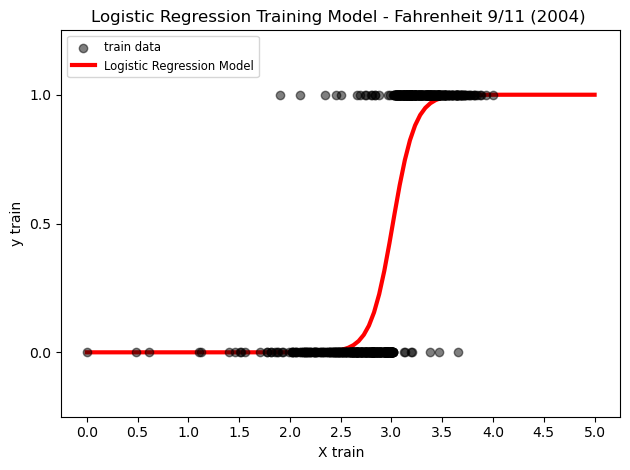

In [30]:
#train data
plt.clf()
plt.scatter(X_trainf.ravel(), y_trainf, label="train data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y train")
plt.xlabel("X train")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Training Model - Fahrenheit 9/11 (2004) ')
plt.tight_layout()
plt.show()

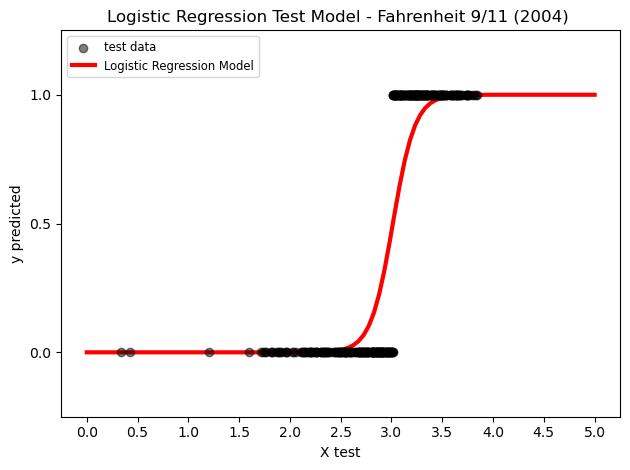

In [31]:
#test data
plt.clf()
plt.scatter(X_testf, fahr_preds.reshape(-1,1), label="test data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Test Model - Fahrenheit 9/11 (2004) ')
plt.tight_layout()
plt.show()

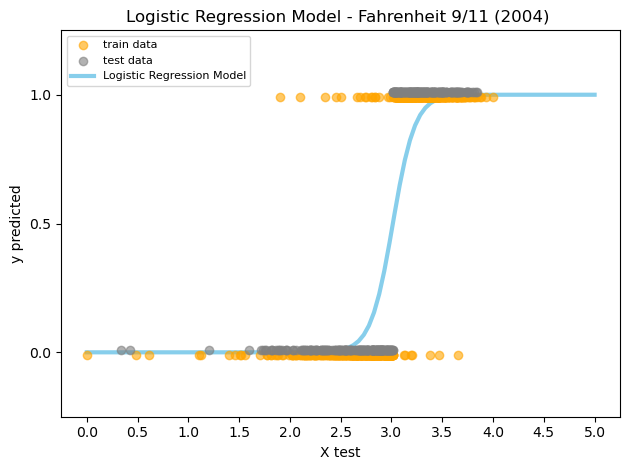

In [32]:
#test&train data
plt.clf()
plt.scatter(X_trainf.ravel(), y_trainf-0.01, label="train data", color="orange", alpha=0.6, zorder=20)
plt.scatter(X_testf, fahr_preds.reshape(-1,1)+0.01, label="test data", color="grey", alpha=0.6, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="skyblue", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize=8,
)
plt.title('Logistic Regression Model - Fahrenheit 9/11 (2004) ')
plt.tight_layout()
plt.show()

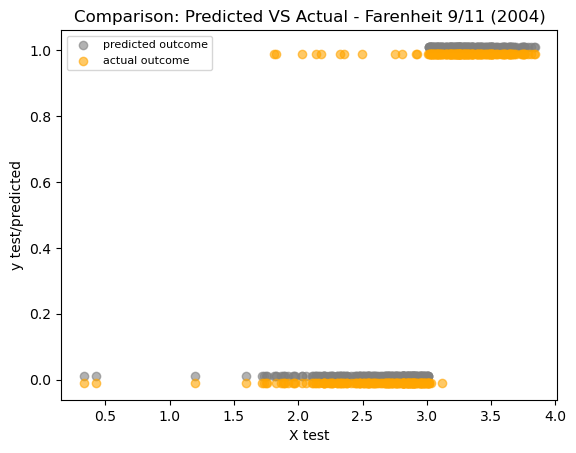

In [33]:
plt.scatter(X_testf, fahr_preds.reshape(-1,1)+0.01, label="predicted outcome", color="grey", alpha=0.6, zorder=20)
plt.scatter(X_testf, y_testf-0.01, label="actual outcome", color="orange", alpha=0.6, zorder=20)
plt.xlabel('X test')
plt.ylabel('y test/predicted')
plt.title('Comparison: Predicted VS Actual - Farenheit 9/11 (2004)')
plt.legend(fontsize=8)
plt.show()

## Happy Gilmore (1996) logistic regression

In [34]:
#Logistic Regression - Happy Gilmore (1996)
clf = LogisticRegressionCV(random_state=0).fit(X_trainh, y_trainh.ravel()) #model
hg_preds = clf.predict(X_testh) #predictions

#betas
hg_betas = clf.coef_

#AUC score
hg_y_pred_proba = clf.predict_proba(X_testh)[::,1]
hg_auc = sklearn.metrics.roc_auc_score(y_testh, hg_y_pred_proba)

print("Happy Gilmore (1996):\nBetas: ", hg_betas, "\nAUC: ", hg_auc)

Happy Gilmore (1996):
Betas:  [[0.5220606]] 
AUC:  0.9196130247251079


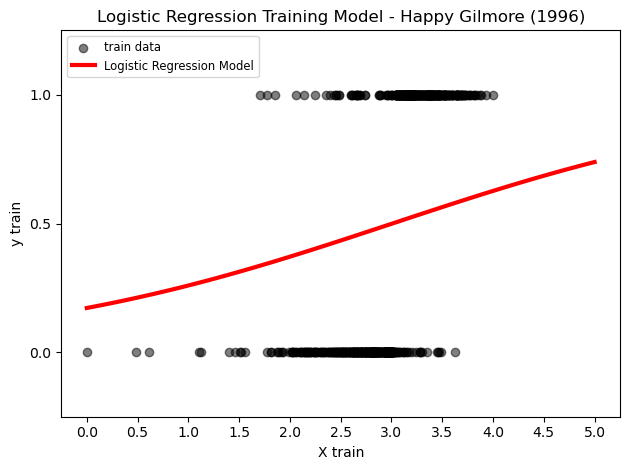

In [35]:
#train data
plt.clf()
plt.scatter(X_trainh.ravel(), y_trainh, label="train data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y train")
plt.xlabel("X train")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Training Model - Happy Gilmore (1996)')
plt.tight_layout()
plt.show()

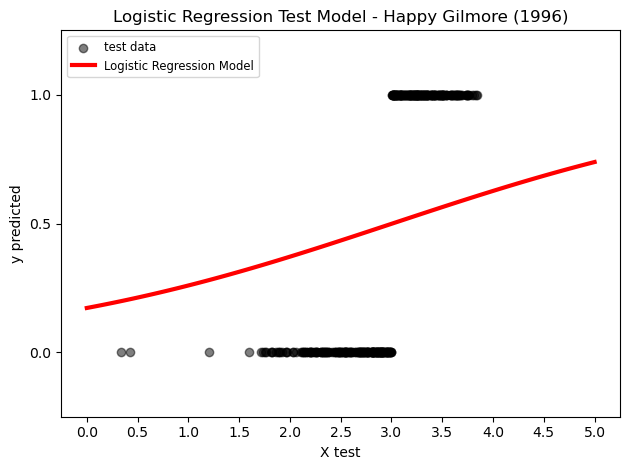

In [36]:
#test data
plt.clf()
plt.scatter(X_testh, hg_preds.reshape(-1,1), label="test data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Test Model - Happy Gilmore (1996)')
plt.tight_layout()
plt.show()

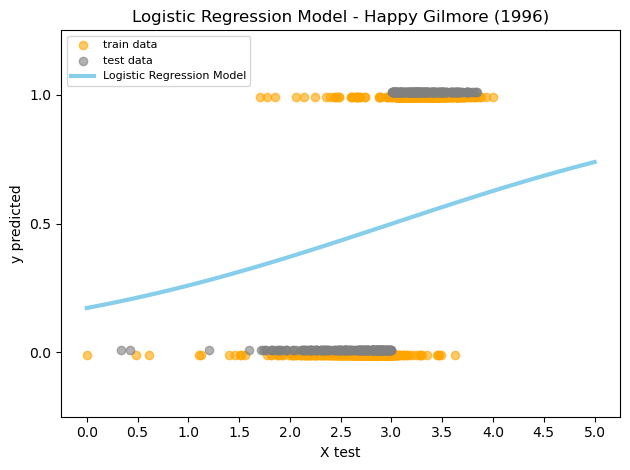

In [37]:
#test&train data
plt.clf()
plt.scatter(X_trainh.ravel(), y_trainh-0.01, label="train data", color="orange", alpha=0.6, zorder=20)
plt.scatter(X_testh, hg_preds.reshape(-1,1)+0.01, label="test data", color="grey", alpha=0.6, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="skyblue", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize=8,
)
plt.title('Logistic Regression Model - Happy Gilmore (1996)')
plt.tight_layout()
plt.show()

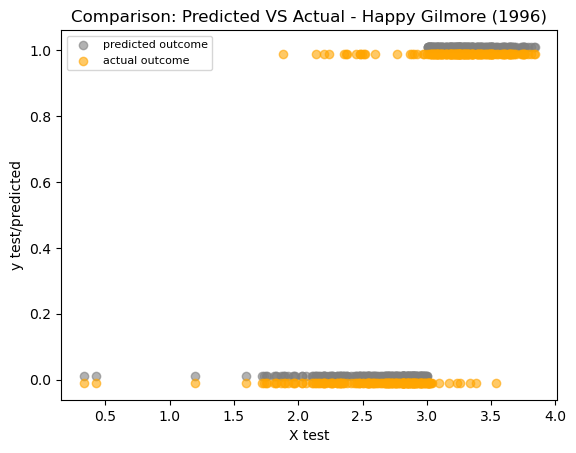

In [38]:
plt.scatter(X_testh, hg_preds.reshape(-1,1)+0.01, label="predicted outcome", color="grey", alpha=0.6, zorder=20)
plt.scatter(X_testh, y_testh-0.01, label="actual outcome", color="orange", alpha=0.6, zorder=20)
plt.xlabel('X test')
plt.ylabel('y test/predicted')
plt.title('Comparison: Predicted VS Actual - Happy Gilmore (1996)')
plt.legend(fontsize=8)
plt.show()

## Diamonds are Forever (1971) logistic regression

In [39]:
#Logistic Regression - Diamonds are Forever (1971)
clf = LogisticRegressionCV(random_state=0).fit(X_traind, y_traind.ravel()) #model
diam_preds = clf.predict(X_testd) #predictions

#betas
diam_betas = clf.coef_

#AUC score
diam_y_pred_proba = clf.predict_proba(X_testd)[::,1]
diam_auc = sklearn.metrics.roc_auc_score(y_testd, diam_y_pred_proba)

print("Diamonds are Forever (1971):\nBetas: ", diam_betas, "\nAUC: ", diam_auc)

Diamonds are Forever (1971):
Betas:  [[8.68510004]] 
AUC:  0.962570578592678


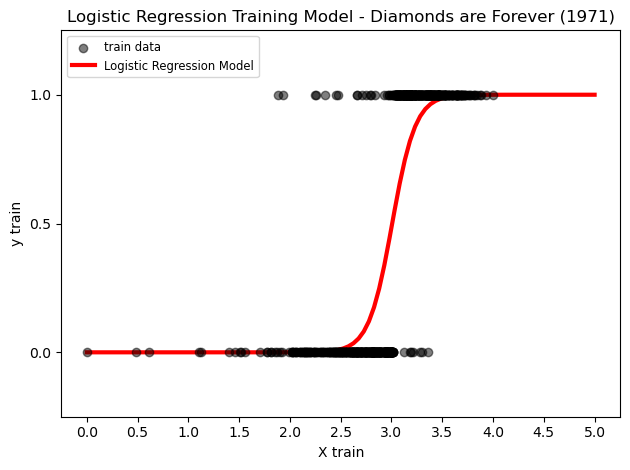

In [40]:
#train data
plt.clf()
plt.scatter(X_traind.ravel(), y_traind, label="train data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y train")
plt.xlabel("X train")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Training Model - Diamonds are Forever (1971)')
plt.tight_layout()
plt.show()

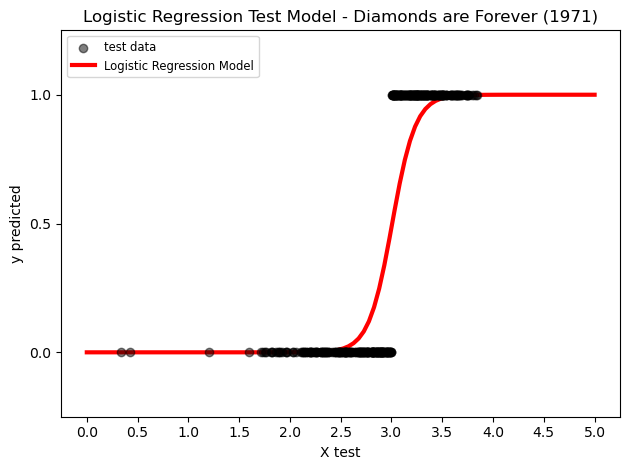

In [41]:
#test data
plt.clf()
plt.scatter(X_testd, diam_preds.reshape(-1,1), label="test data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Test Model - Diamonds are Forever (1971)')
plt.tight_layout()
plt.show()

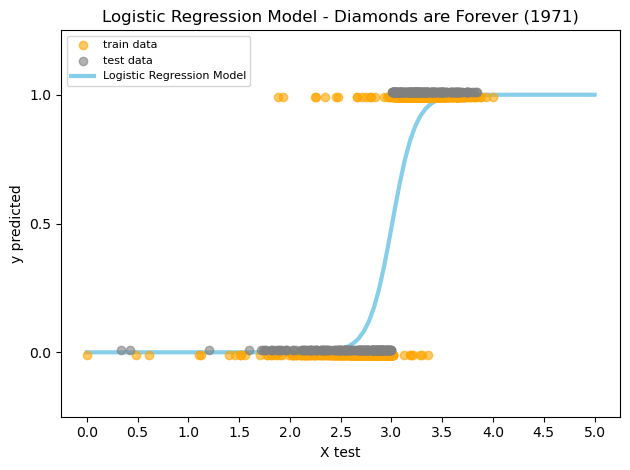

In [42]:
#test&train data
plt.clf()
plt.scatter(X_traind.ravel(), y_traind-0.01, label="train data", color="orange", alpha=0.6, zorder=20)
plt.scatter(X_testd, diam_preds.reshape(-1,1)+0.01, label="test data", color="grey", alpha=0.6, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="skyblue", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize=8,
)
plt.title('Logistic Regression Model - Diamonds are Forever (1971)')
plt.tight_layout()
plt.show()

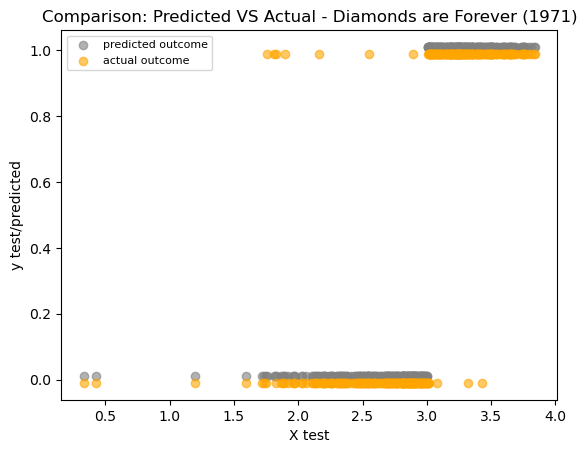

In [43]:
plt.scatter(X_testd, diam_preds.reshape(-1,1)+0.01, label="predicted outcome", color="grey", alpha=0.6, zorder=20)
plt.scatter(X_testd, y_testd-0.01, label="actual outcome", color="orange", alpha=0.6, zorder=20)
plt.xlabel('X test')
plt.ylabel('y test/predicted')
plt.title('Comparison: Predicted VS Actual - Diamonds are Forever (1971)')
plt.legend(fontsize=8)
plt.show()

## Scream (1996) logistic regression

In [44]:
#Logistic Regression - Scream (1996)
clf = LogisticRegressionCV(random_state=0).fit(X_trains, y_trains.ravel()) #model
scream_preds = clf.predict(X_tests) #predictions

#betas
scream_betas = clf.coef_

#AUC score
scream_y_pred_proba = clf.predict_proba(X_tests)[::,1]
scream_auc = sklearn.metrics.roc_auc_score(y_tests, scream_y_pred_proba)

print("Scream (1996):\nBetas: ", scream_betas, "\nAUC: ", scream_auc)

Scream (1996):
Betas:  [[0.49141674]] 
AUC:  0.899109747204667


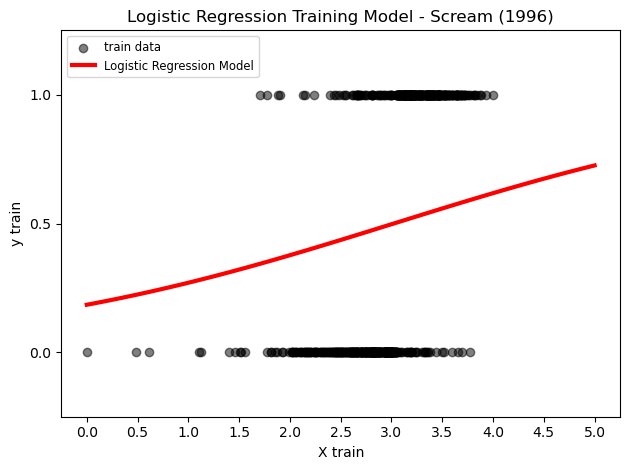

In [45]:
#train data
plt.clf()
plt.scatter(X_trains.ravel(), y_trains, label="train data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y train")
plt.xlabel("X train")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Training Model - Scream (1996)')
plt.tight_layout()
plt.show()

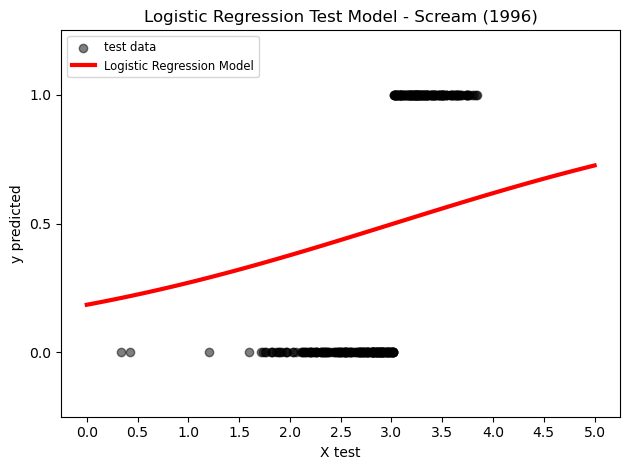

In [46]:
#test data
plt.clf()
plt.scatter(X_tests, scream_preds.reshape(-1,1), label="test data", color="black", alpha=0.5, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Test Model - Scream (1996)')
plt.tight_layout()
plt.show()

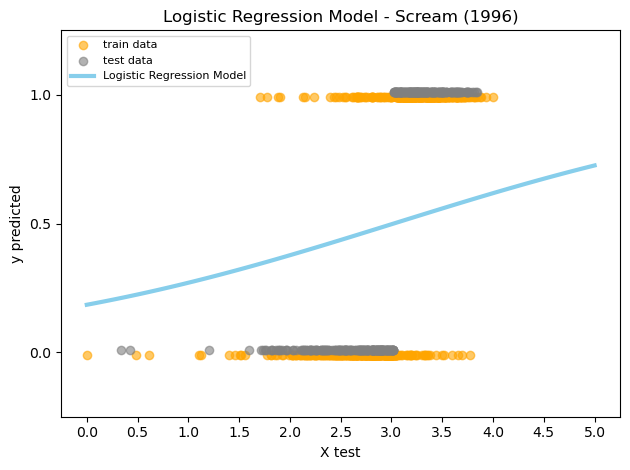

In [47]:
#test&train data
plt.clf()
plt.scatter(X_trains.ravel(), y_trains-0.01, label="train data", color="orange", alpha=0.6, zorder=20)
plt.scatter(X_tests, scream_preds.reshape(-1,1)+0.01, label="test data", color="grey", alpha=0.6, zorder=20)
X_test = np.linspace(0, 5, 100)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="skyblue", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize=8,
)
plt.title('Logistic Regression Model - Scream (1996)')
plt.tight_layout()
plt.show()

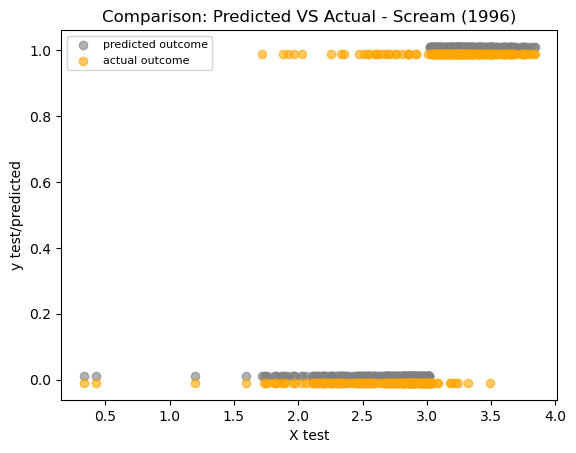

In [48]:
plt.scatter(X_tests, scream_preds.reshape(-1,1)+0.01, label="predicted outcome", color="grey", alpha=0.6, zorder=20)
plt.scatter(X_tests, y_tests-0.01, label="actual outcome", color="orange", alpha=0.6, zorder=20)
plt.xlabel('X test')
plt.ylabel('y test/predicted')
plt.title('Comparison: Predicted VS Actual - Scream (1996)')
plt.legend(fontsize=8)
plt.show()

## Comment on quality of models
For Farenheit 9/11, the beta is 9.15 and the AUC score is 0.96 which means approximately 96% of the predictions were correct.

For Happy Gilmore, the beta is 0.52 and the AUC score is 0.92 which means approximately 92% of the predictions were correct.

For Diamonds are Forever, the beta is 8.69 and the AUC score is 0.96 which means approximately 96% of the predictions were correct.

For Scream, the beta is 0.49 and the AUC score is 0.90 which means approximately 90% of the predictions were correct.

For all 4 of these movies, despite varying beta scores, using the averaged movie ratings for each user as X produced a logistic regression model that had roughly 90% or higher AUC scores.

Most prediction errors occurred around the inflection point which means that viewers who tend to rate movies lower altogether, rated these 4 movies lower (i.e. enjoyment=0), and viewers who tend to rate movies higher altogether rated these 4 movies higher (i.e. enjoyment=1).

# Extra Credit
Question: Can viewers' ratings of "Gets nervous easily" be used as a good predictor of their level of enjoyment of a scary movie - The Exorcist (1973)?

## Get data

In [49]:
ex_df = clean_df[['The Exorcist (1973)', 'Gets nervous easily']].copy()

In [50]:
#use median split to determine enjoyment of movie
med = statistics.median(clean_df['The Exorcist (1973)'])
split = []

for i in range(len(clean_df)):
    if clean_df.loc[i, 'The Exorcist (1973)'] < med:
        split.append(0)
    else:
        split.append(1)

ex_df['enjoyment'] = split

mean_nerv = ex_df['Gets nervous easily'].mean()

for i in range(len(ex_df)):
    if np.isnan(ex_df.loc[i, 'Gets nervous easily']):
        ex_df.loc[i, 'Gets nervous easily'] = mean_nerv
    else:
        continue

In [51]:
ex_df

,The Exorcist (1973),Gets nervous easily,enjoyment
0,0.000000,4.0,0
1,2.576253,2.0,0
2,2.870024,4.0,1
3,2.419934,4.0,0
4,2.346091,4.0,0
...,...,...,...
1092,2.812617,4.0,1
1093,4.000000,5.0,1
1094,2.778882,4.0,1
1095,2.907929,5.0,1


In [52]:
#split data into test and train
X = ex_df['Gets nervous easily']
y = ex_df['enjoyment']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.33, random_state=0)

X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test)

## Logistic Regression

In [53]:
#Logistic Regression
clf = LogisticRegressionCV(random_state=0).fit(X_train, y_train) #model
preds = clf.predict(X_test) #predictions

#betas
betas = clf.coef_

#AUC score
y_pred_proba = clf.predict_proba(X_test)[::,1]
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)

print("The Exorcist (1973):\nBetas: ", betas, "\nAUC: ", auc)

The Exorcist (1973):
Betas:  [[-0.00076641]] 
AUC:  0.48337685207675496


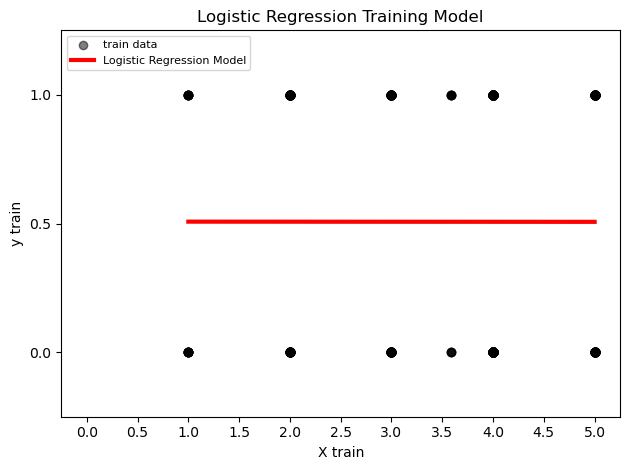

In [54]:
#train data
plt.clf()
plt.scatter(X_train.ravel(), y_train, label="train data", color="black", alpha=0.5, zorder=20)
X_test1 = np.linspace(1, 5, 100)

loss = expit(X_test1 * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test1, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y train")
plt.xlabel("X train")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize=8,
)
plt.title('Logistic Regression Training Model')
plt.tight_layout()
plt.show()

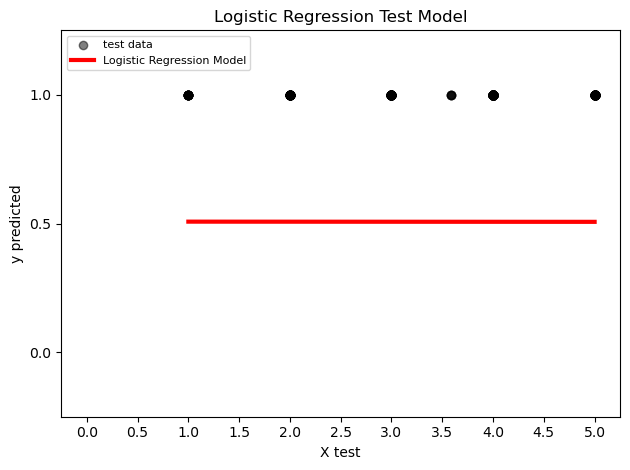

In [55]:
#test data
plt.clf()
plt.scatter(X_test, preds.reshape(-1,1), label="test data", color="black", alpha=0.5, zorder=20)
X_test1 = np.linspace(1, 5, 100)

loss = expit(X_test1 * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test1, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize=8,
)
plt.title('Logistic Regression Test Model')
plt.tight_layout()
plt.show()

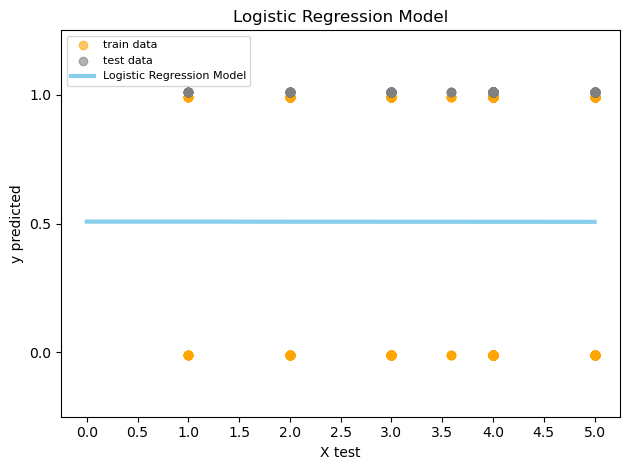

In [56]:
#test&train data
plt.clf()
plt.scatter(X_train.ravel(), y_train-0.01, label="train data", color="orange", alpha=0.6, zorder=20)
plt.scatter(X_test, preds.reshape(-1,1)+0.01, label="test data", color="grey", alpha=0.6, zorder=20)
X_test1 = np.linspace(0, 5, 100)

loss = expit(X_test1 * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test1, loss, label="Logistic Regression Model", color="skyblue", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 5.25)
plt.legend(
    loc="upper left",
    fontsize=8,
)
plt.title('Logistic Regression Model')
plt.tight_layout()
plt.show()

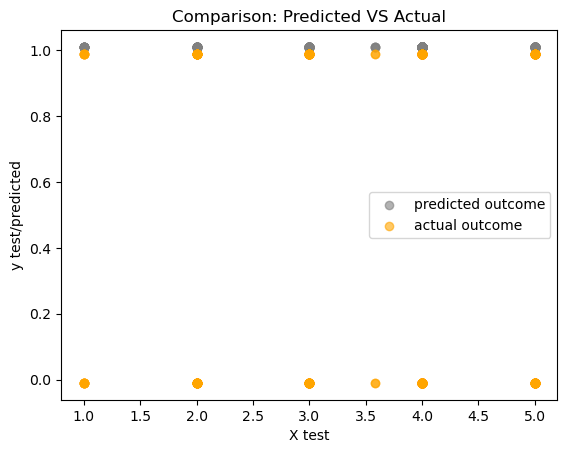

In [57]:
plt.scatter(X_test, preds.reshape(-1,1)+0.01, label="predicted outcome", color="grey", alpha=0.6, zorder=20)
plt.scatter(X_test, y_test-0.01, label="actual outcome", color="orange", alpha=0.6, zorder=20)
plt.xlabel('X test')
plt.ylabel('y test/predicted')
plt.title('Comparison: Predicted VS Actual')
plt.legend()
plt.show()

## Comment

"Gets nervous easily" is a poor parameter for predicting enjoyment of The Exorcist in a logistic regression. The beta weight of this parameter is nearly zero. The AUC of this parameter is 0.48 which means nearly half of the predictions are wrong. We can see this in the graphs since all the predicted outcomes are 1 when, in actuality, there are 0 and 1 outcomes for each level of "gets nervous easily".